In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid", palette="Set2")

In [2]:
df = pd.read_parquet("../Datasets/df_kulik_rdkit_processed.parquet")

## Dataset split

In [3]:
y = df['TD_ET_00']
X = df.drop(columns=[col for col in df.columns if 'TD' in col]+['isomeric_smiles'])

Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2651120, 75) (662780, 75) (2651120,) (662780,)


Validation split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1988340, 75) (662780, 75) (1988340,) (662780,)


## Saving

In [11]:
X_train.to_parquet("../Datasets/DF_split/X_train.parquet")
X_val.to_parquet("../Datasets/DF_split/X_val.parquet")
X_test.to_parquet("../Datasets/DF_split/X_test.parquet")

In [13]:
y_train.to_csv("../Datasets/DF_split/y_train.csv", index=False)
y_val.to_csv("../Datasets/DF_split/y_val.csv", index=False)
y_test.to_csv("../Datasets/DF_split/y_test.csv", index=False)

In [20]:
y_hat = pd.read_csv("../Datasets/DF_split/y_train.csv")['TD_ET_00']

## Comparative EDA

### Kulik descriptors

<Axes: ylabel='Frequency'>

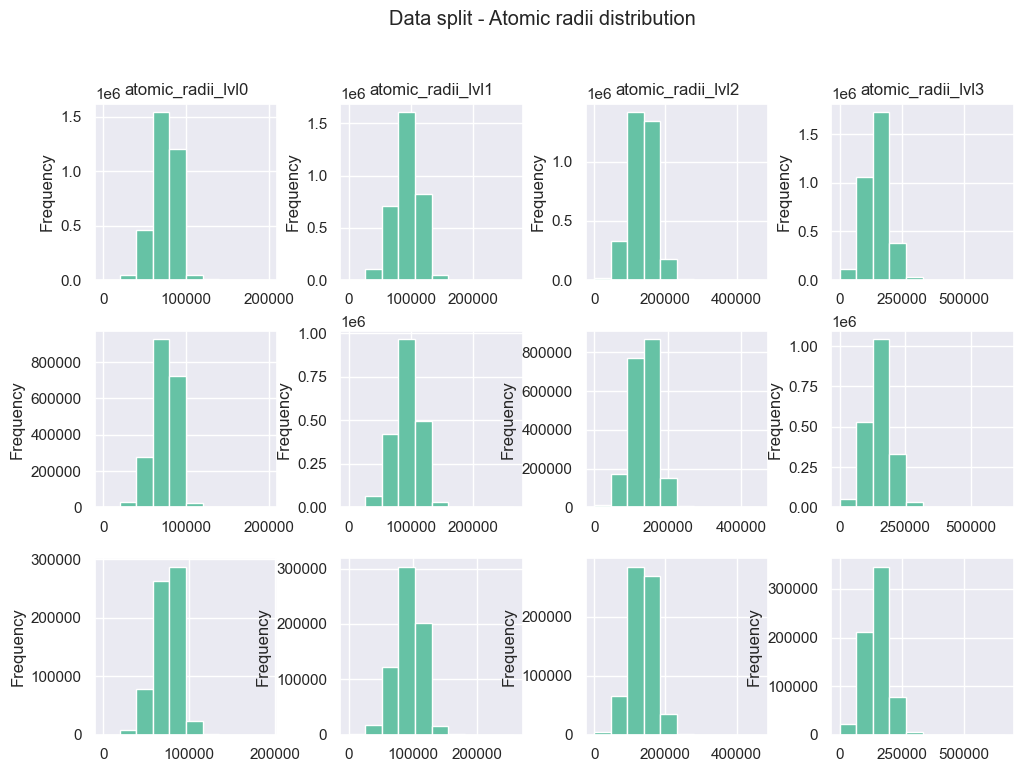

In [22]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - Atomic radii distribution', y=1.1)

#X_train
df['atomic_radii_lvl0'].plot.hist( ax=axs[0,0], title='atomic_radii_lvl0')
df['atomic_radii_lvl1'].plot.hist( ax=axs[0,1], title='atomic_radii_lvl1')
df['atomic_radii_lvl2'].plot.hist( ax=axs[0,2], title='atomic_radii_lvl2')
df['atomic_radii_lvl3'].plot.hist( ax=axs[0,3], title='atomic_radii_lvl3')

#X_train
X_train['atomic_radii_lvl0'].plot.hist(ax=axs[1,0])
X_train['atomic_radii_lvl1'].plot.hist(ax=axs[1,1])
X_train['atomic_radii_lvl2'].plot.hist(ax=axs[1,2])
X_train['atomic_radii_lvl3'].plot.hist(ax=axs[1,3])

#X_val
X_val['atomic_radii_lvl0'].plot.hist(ax=axs[2,0])
X_val['atomic_radii_lvl1'].plot.hist(ax=axs[2,1])
X_val['atomic_radii_lvl2'].plot.hist(ax=axs[2,2])
X_val['atomic_radii_lvl3'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

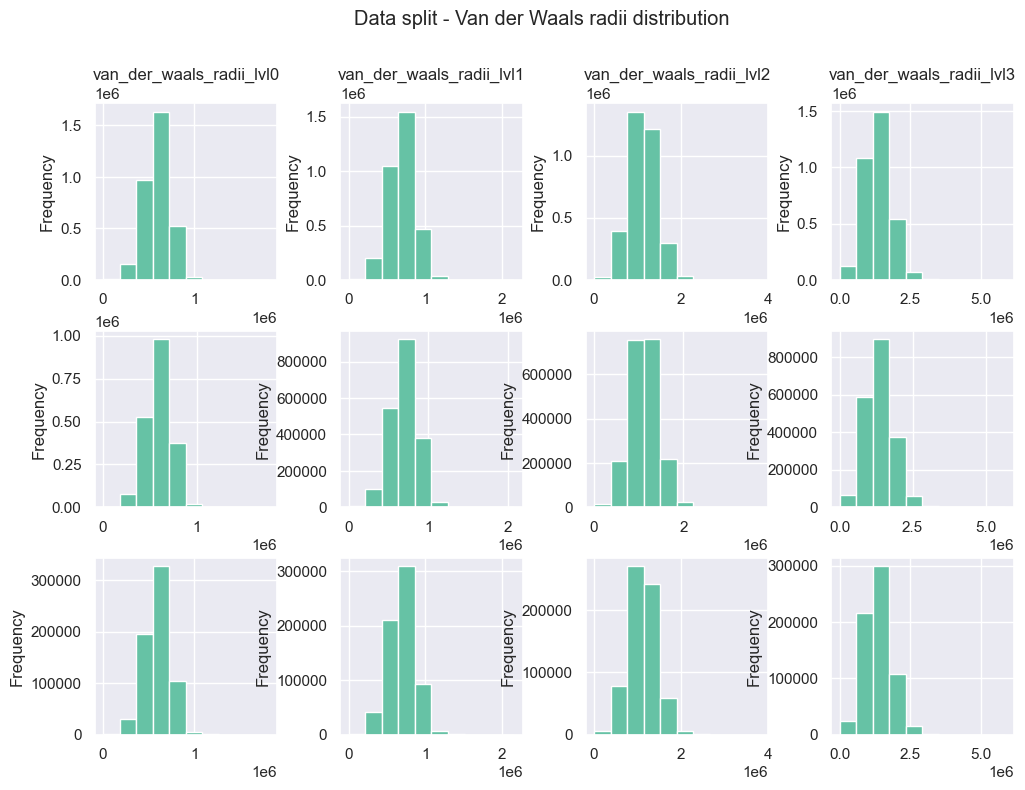

In [23]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - Van der Waals radii distribution', y=1.1)

#X_train
df['van_der_waals_radii_lvl0'].plot.hist( ax=axs[0,0], title='van_der_waals_radii_lvl0')
df['van_der_waals_radii_lvl1'].plot.hist( ax=axs[0,1], title='van_der_waals_radii_lvl1')
df['van_der_waals_radii_lvl2'].plot.hist( ax=axs[0,2], title='van_der_waals_radii_lvl2')
df['van_der_waals_radii_lvl3'].plot.hist( ax=axs[0,3], title='van_der_waals_radii_lvl3')

#X_train
X_train['van_der_waals_radii_lvl0'].plot.hist(ax=axs[1,0])
X_train['van_der_waals_radii_lvl1'].plot.hist(ax=axs[1,1])
X_train['van_der_waals_radii_lvl2'].plot.hist(ax=axs[1,2])
X_train['van_der_waals_radii_lvl3'].plot.hist(ax=axs[1,3])

#X_val
X_val['van_der_waals_radii_lvl0'].plot.hist(ax=axs[2,0])
X_val['van_der_waals_radii_lvl1'].plot.hist(ax=axs[2,1])
X_val['van_der_waals_radii_lvl2'].plot.hist(ax=axs[2,2])
X_val['van_der_waals_radii_lvl3'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

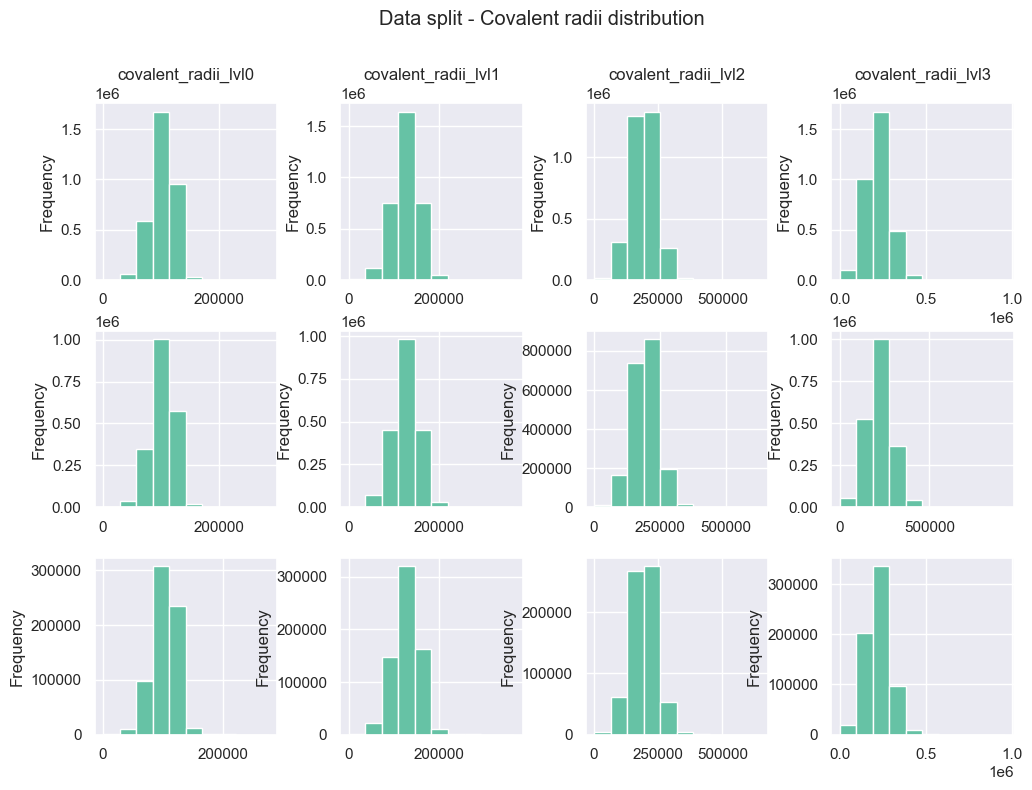

In [24]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - Covalent radii distribution', y=1.1)

#X_train
df['covalent_radii_lvl0'].plot.hist( ax=axs[0,0], title='covalent_radii_lvl0')
df['covalent_radii_lvl1'].plot.hist( ax=axs[0,1], title='covalent_radii_lvl1')
df['covalent_radii_lvl2'].plot.hist( ax=axs[0,2], title='covalent_radii_lvl2')
df['covalent_radii_lvl3'].plot.hist( ax=axs[0,3], title='covalent_radii_lvl3')

#X_train
X_train['covalent_radii_lvl0'].plot.hist(ax=axs[1,0])
X_train['covalent_radii_lvl1'].plot.hist(ax=axs[1,1])
X_train['covalent_radii_lvl2'].plot.hist(ax=axs[1,2])
X_train['covalent_radii_lvl3'].plot.hist(ax=axs[1,3])

#X_val
X_val['covalent_radii_lvl0'].plot.hist(ax=axs[2,0])
X_val['covalent_radii_lvl1'].plot.hist(ax=axs[2,1])
X_val['covalent_radii_lvl2'].plot.hist(ax=axs[2,2])
X_val['covalent_radii_lvl3'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

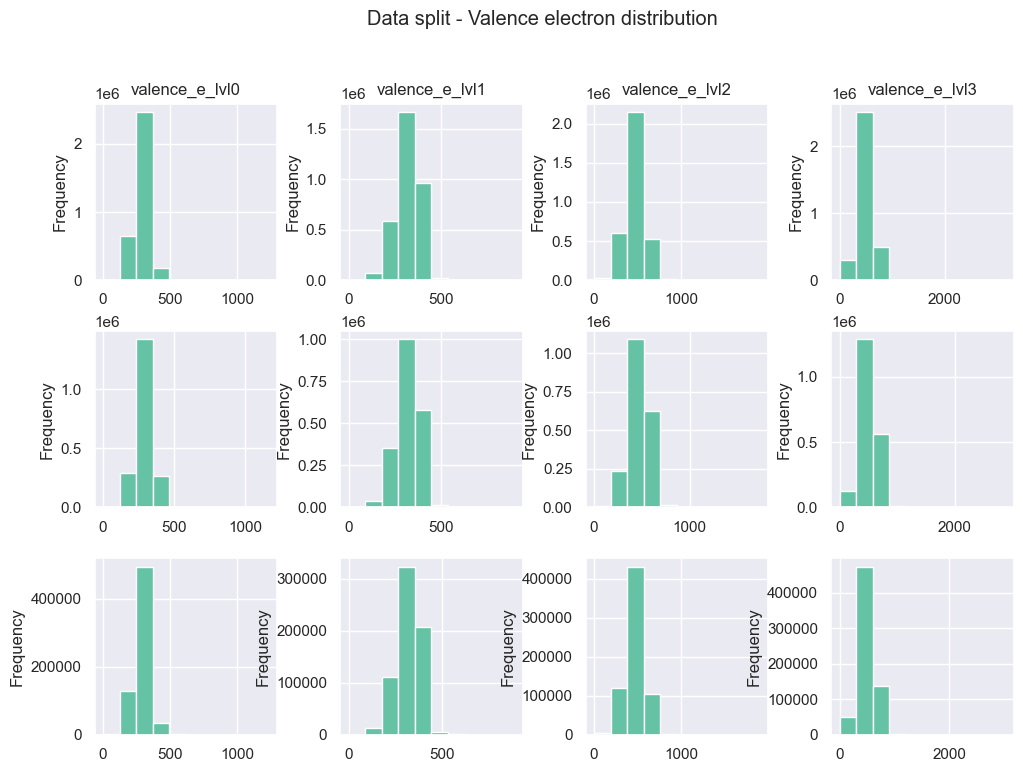

In [25]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - Valence electron distribution', y=1.1)

#X_train
df['valence_e_lvl0'].plot.hist( ax=axs[0,0], title='valence_e_lvl0')
df['valence_e_lvl1'].plot.hist( ax=axs[0,1], title='valence_e_lvl1')
df['valence_e_lvl2'].plot.hist( ax=axs[0,2], title='valence_e_lvl2')
df['valence_e_lvl3'].plot.hist( ax=axs[0,3], title='valence_e_lvl3')

#X_train
X_train['valence_e_lvl0'].plot.hist(ax=axs[1,0])
X_train['valence_e_lvl1'].plot.hist(ax=axs[1,1])
X_train['valence_e_lvl2'].plot.hist(ax=axs[1,2])
X_train['valence_e_lvl3'].plot.hist(ax=axs[1,3])

#X_val
X_val['valence_e_lvl0'].plot.hist(ax=axs[2,0])
X_val['valence_e_lvl1'].plot.hist(ax=axs[2,1])
X_val['valence_e_lvl2'].plot.hist(ax=axs[2,2])
X_val['valence_e_lvl3'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

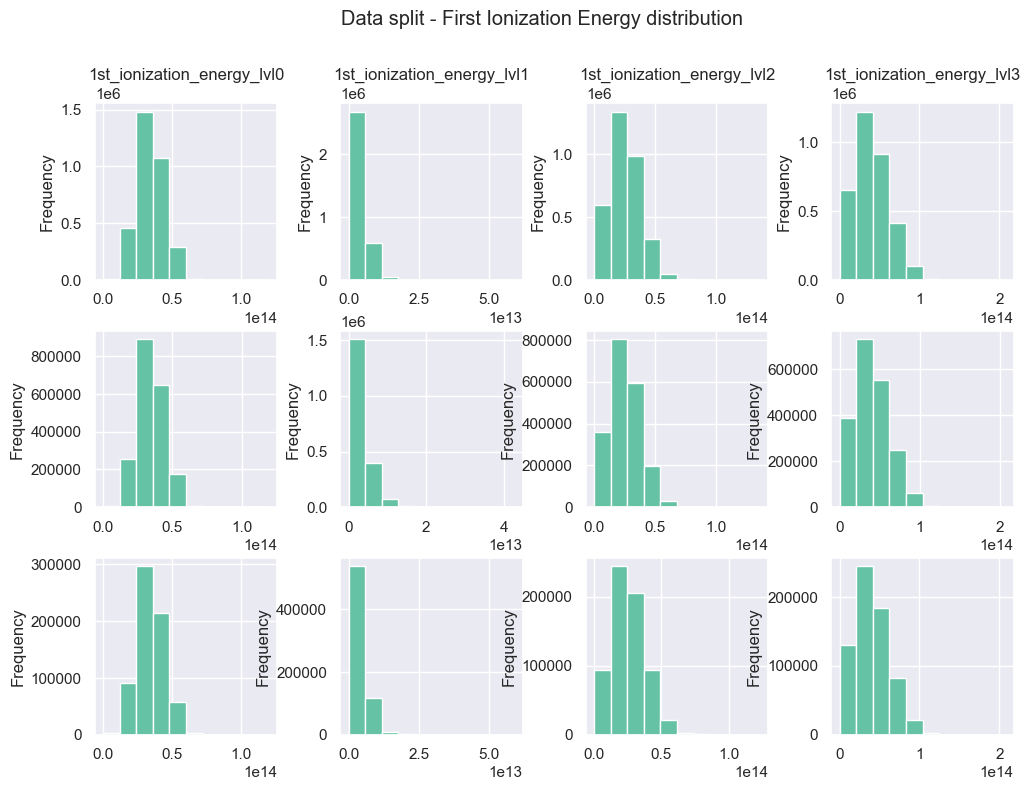

In [26]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - First Ionization Energy distribution', y=1.1)

#X_train
df['1st_ionization_energy_lvl0'].plot.hist( ax=axs[0,0], title='1st_ionization_energy_lvl0')
df['1st_ionization_energy_lvl1'].plot.hist( ax=axs[0,1], title='1st_ionization_energy_lvl1')
df['1st_ionization_energy_lvl2'].plot.hist( ax=axs[0,2], title='1st_ionization_energy_lvl2')
df['1st_ionization_energy_lvl3'].plot.hist( ax=axs[0,3], title='1st_ionization_energy_lvl3')

#X_train
X_train['1st_ionization_energy_lvl0'].plot.hist(ax=axs[1,0])
X_train['1st_ionization_energy_lvl1'].plot.hist(ax=axs[1,1])
X_train['1st_ionization_energy_lvl2'].plot.hist(ax=axs[1,2])
X_train['1st_ionization_energy_lvl3'].plot.hist(ax=axs[1,3])

#X_val
X_val['1st_ionization_energy_lvl0'].plot.hist(ax=axs[2,0])
X_val['1st_ionization_energy_lvl1'].plot.hist(ax=axs[2,1])
X_val['1st_ionization_energy_lvl2'].plot.hist(ax=axs[2,2])
X_val['1st_ionization_energy_lvl3'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

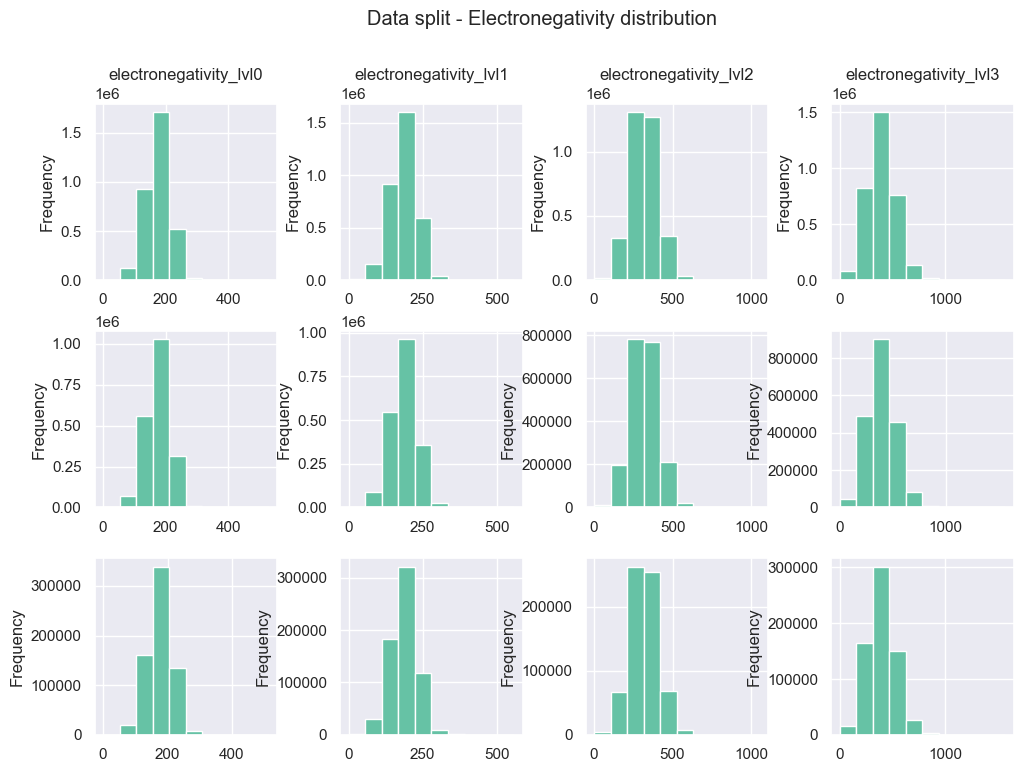

In [27]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - Electronegativity distribution', y=1.1)

#X_train
df['electronegativity_lvl0'].plot.hist( ax=axs[0,0], title='electronegativity_lvl0')
df['electronegativity_lvl1'].plot.hist( ax=axs[0,1], title='electronegativity_lvl1')
df['electronegativity_lvl2'].plot.hist( ax=axs[0,2], title='electronegativity_lvl2')
df['electronegativity_lvl3'].plot.hist( ax=axs[0,3], title='electronegativity_lvl3')

#X_train
X_train['electronegativity_lvl0'].plot.hist(ax=axs[1,0])
X_train['electronegativity_lvl1'].plot.hist(ax=axs[1,1])
X_train['electronegativity_lvl2'].plot.hist(ax=axs[1,2])
X_train['electronegativity_lvl3'].plot.hist(ax=axs[1,3])

#X_val
X_val['electronegativity_lvl0'].plot.hist(ax=axs[2,0])
X_val['electronegativity_lvl1'].plot.hist(ax=axs[2,1])
X_val['electronegativity_lvl2'].plot.hist(ax=axs[2,2])
X_val['electronegativity_lvl3'].plot.hist(ax=axs[2,3])

### RDKit descriptors

<Axes: ylabel='Frequency'>

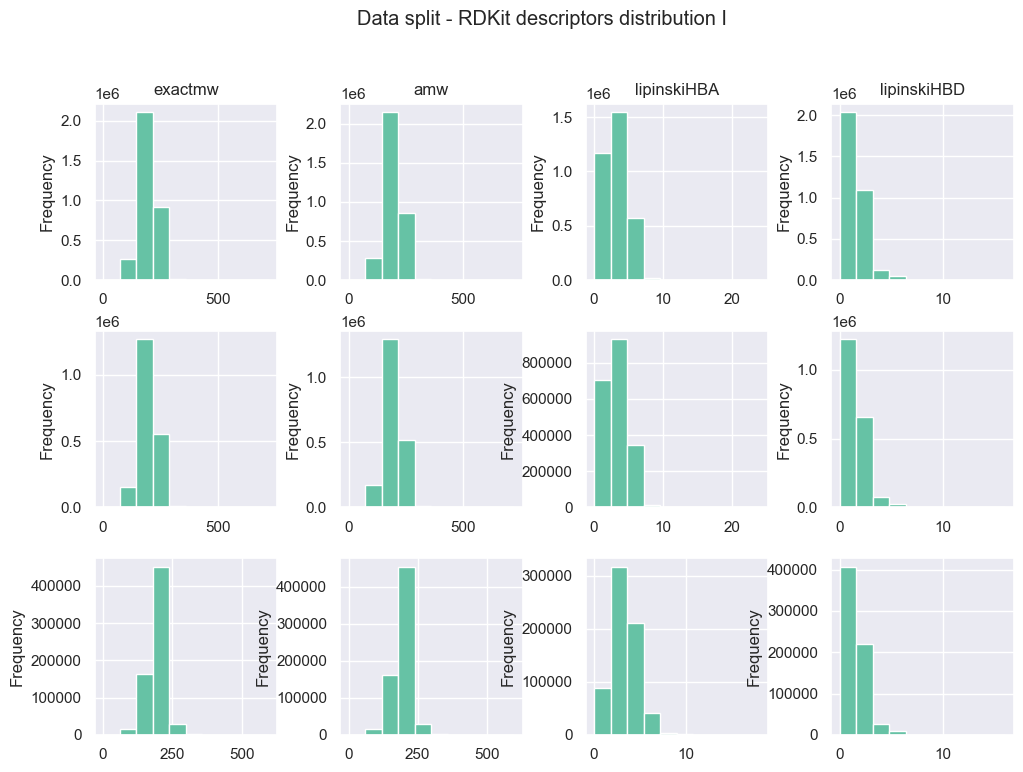

In [28]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution I', y=1.1)

#X_train
df['exactmw'].plot.hist( ax=axs[0,0], title='exactmw')
df['amw'].plot.hist( ax=axs[0,1], title='amw')
df['lipinskiHBA'].plot.hist( ax=axs[0,2], title='lipinskiHBA')
df['lipinskiHBD'].plot.hist( ax=axs[0,3], title='lipinskiHBD')

#X_train
X_train['exactmw'].plot.hist(ax=axs[1,0])
X_train['amw'].plot.hist(ax=axs[1,1])
X_train['lipinskiHBA'].plot.hist(ax=axs[1,2])
X_train['lipinskiHBD'].plot.hist(ax=axs[1,3])

#X_val
X_val['exactmw'].plot.hist(ax=axs[2,0])
X_val['amw'].plot.hist(ax=axs[2,1])
X_val['lipinskiHBA'].plot.hist(ax=axs[2,2])
X_val['lipinskiHBD'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

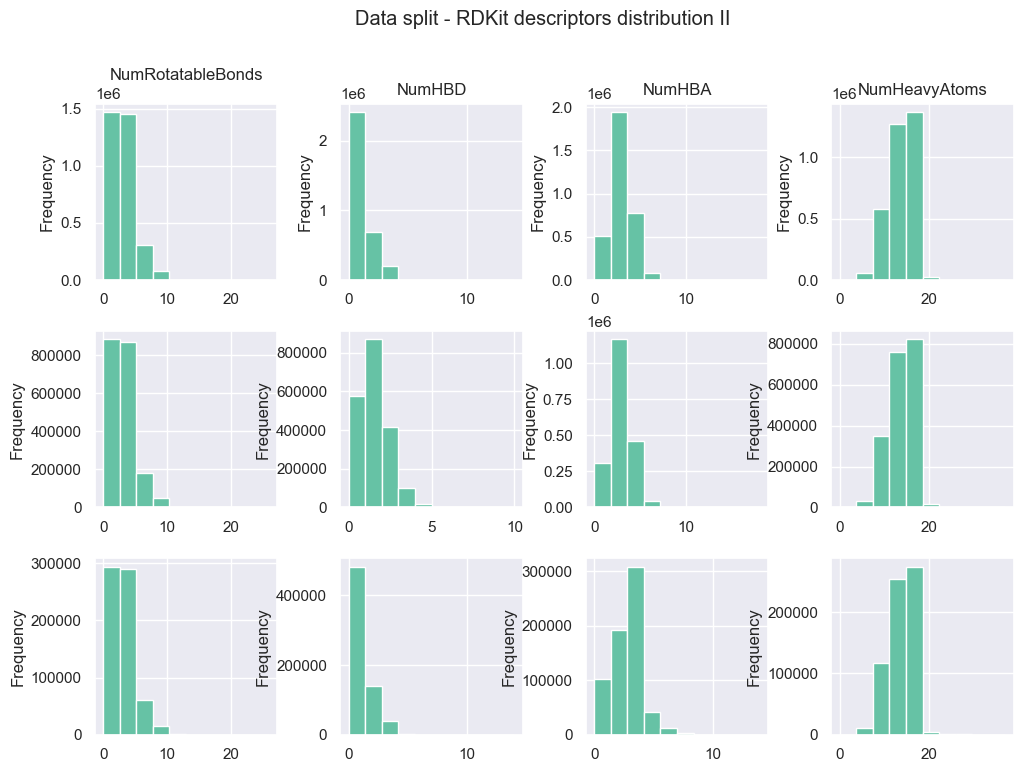

In [29]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution II', y=1.1)

#X_train
df['NumRotatableBonds'].plot.hist( ax=axs[0,0], title='NumRotatableBonds')
df['NumHBD'].plot.hist( ax=axs[0,1], title='NumHBD')
df['NumHBA'].plot.hist( ax=axs[0,2], title='NumHBA')
df['NumHeavyAtoms'].plot.hist( ax=axs[0,3], title='NumHeavyAtoms')

#X_train
X_train['NumRotatableBonds'].plot.hist(ax=axs[1,0])
X_train['NumHBD'].plot.hist(ax=axs[1,1])
X_train['NumHBA'].plot.hist(ax=axs[1,2])
X_train['NumHeavyAtoms'].plot.hist(ax=axs[1,3])

#X_val
X_val['NumRotatableBonds'].plot.hist(ax=axs[2,0])
X_val['NumHBD'].plot.hist(ax=axs[2,1])
X_val['NumHBA'].plot.hist(ax=axs[2,2])
X_val['NumHeavyAtoms'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

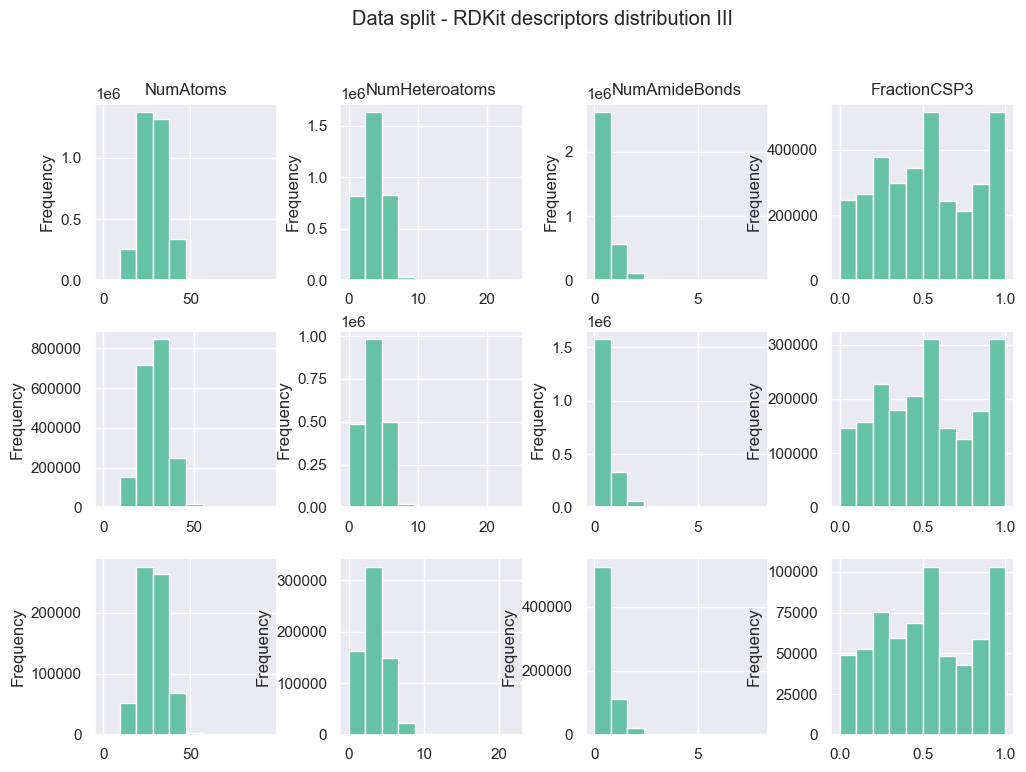

In [30]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution III', y=1.1)

#X_train
df['NumAtoms'].plot.hist( ax=axs[0,0], title='NumAtoms')
df['NumHeteroatoms'].plot.hist( ax=axs[0,1], title='NumHeteroatoms')
df['NumAmideBonds'].plot.hist( ax=axs[0,2], title='NumAmideBonds')
df['FractionCSP3'].plot.hist( ax=axs[0,3], title='FractionCSP3')

#X_train
X_train['NumAtoms'].plot.hist(ax=axs[1,0])
X_train['NumHeteroatoms'].plot.hist(ax=axs[1,1])
X_train['NumAmideBonds'].plot.hist(ax=axs[1,2])
X_train['FractionCSP3'].plot.hist(ax=axs[1,3])

#X_val
X_val['NumAtoms'].plot.hist(ax=axs[2,0])
X_val['NumHeteroatoms'].plot.hist(ax=axs[2,1])
X_val['NumAmideBonds'].plot.hist(ax=axs[2,2])
X_val['FractionCSP3'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

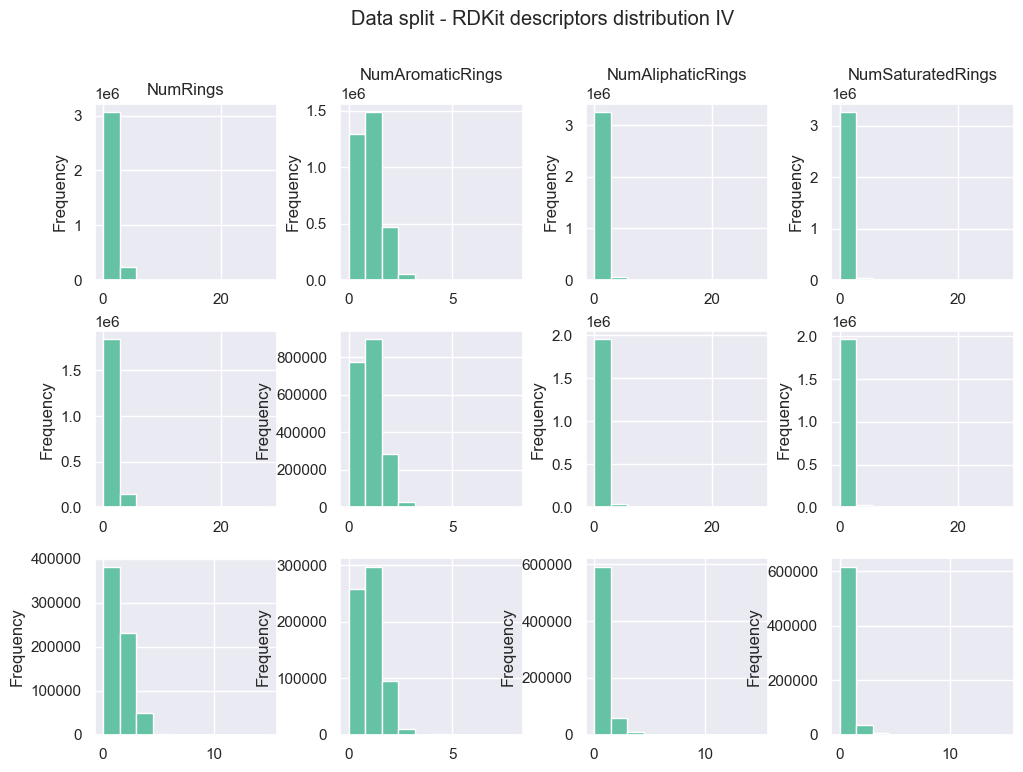

In [31]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution IV', y=1.1)

#X_train
df['NumRings'].plot.hist( ax=axs[0,0], title='NumRings')
df['NumAromaticRings'].plot.hist( ax=axs[0,1], title='NumAromaticRings')
df['NumAliphaticRings'].plot.hist( ax=axs[0,2], title='NumAliphaticRings')
df['NumSaturatedRings'].plot.hist( ax=axs[0,3], title='NumSaturatedRings')

#X_train
X_train['NumRings'].plot.hist(ax=axs[1,0])
X_train['NumAromaticRings'].plot.hist(ax=axs[1,1])
X_train['NumAliphaticRings'].plot.hist(ax=axs[1,2])
X_train['NumSaturatedRings'].plot.hist(ax=axs[1,3])

#X_val
X_val['NumRings'].plot.hist(ax=axs[2,0])
X_val['NumAromaticRings'].plot.hist(ax=axs[2,1])
X_val['NumAliphaticRings'].plot.hist(ax=axs[2,2])
X_val['NumSaturatedRings'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

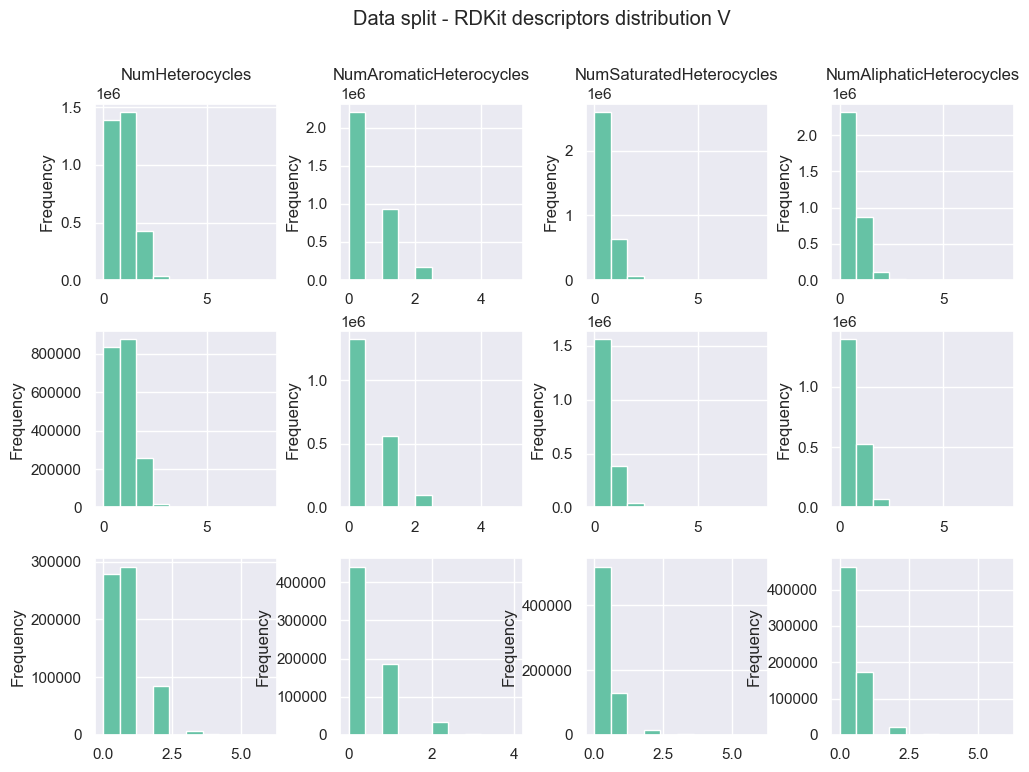

In [32]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution V', y=1.1)

#X_train
df['NumHeterocycles'].plot.hist( ax=axs[0,0], title='NumHeterocycles')
df['NumAromaticHeterocycles'].plot.hist( ax=axs[0,1], title='NumAromaticHeterocycles')
df['NumSaturatedHeterocycles'].plot.hist( ax=axs[0,2], title='NumSaturatedHeterocycles')
df['NumAliphaticHeterocycles'].plot.hist( ax=axs[0,3], title='NumAliphaticHeterocycles')

#X_train
X_train['NumHeterocycles'].plot.hist(ax=axs[1,0])
X_train['NumAromaticHeterocycles'].plot.hist(ax=axs[1,1])
X_train['NumSaturatedHeterocycles'].plot.hist(ax=axs[1,2])
X_train['NumAliphaticHeterocycles'].plot.hist(ax=axs[1,3])

#X_val
X_val['NumHeterocycles'].plot.hist(ax=axs[2,0])
X_val['NumAromaticHeterocycles'].plot.hist(ax=axs[2,1])
X_val['NumSaturatedHeterocycles'].plot.hist(ax=axs[2,2])
X_val['NumAliphaticHeterocycles'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

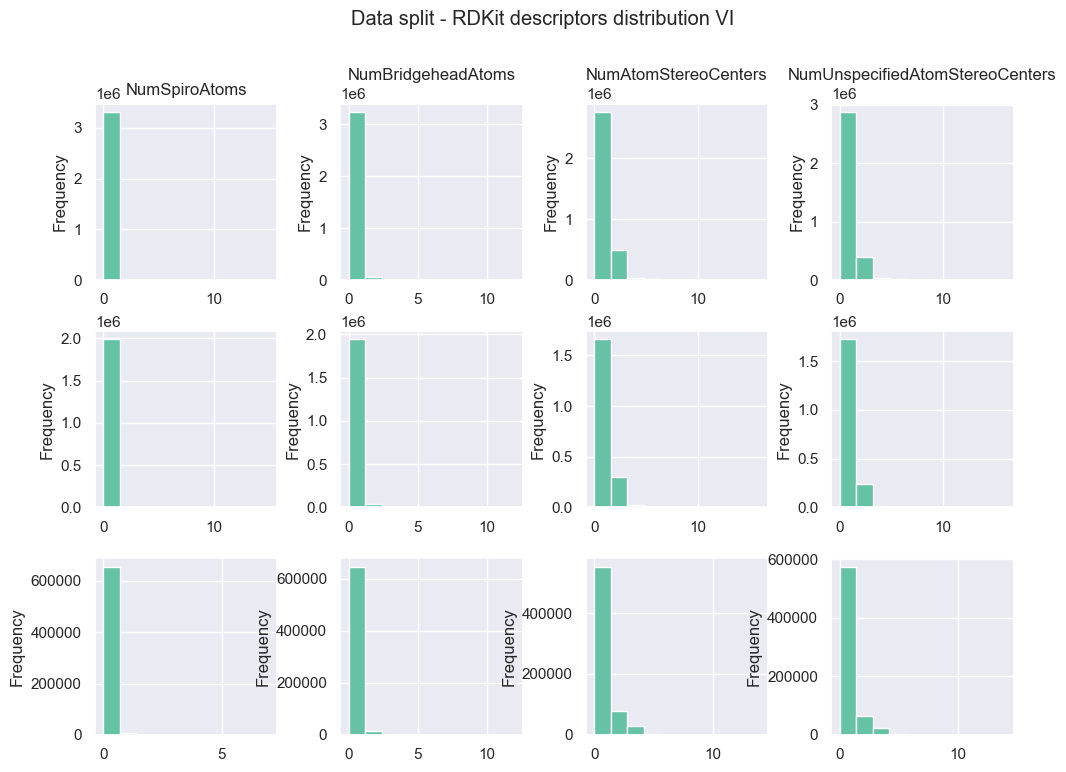

In [33]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution VI', y=1.1)

#X_train
df['NumSpiroAtoms'].plot.hist( ax=axs[0,0], title='NumSpiroAtoms')
df['NumBridgeheadAtoms'].plot.hist( ax=axs[0,1], title='NumBridgeheadAtoms')
df['NumAtomStereoCenters'].plot.hist( ax=axs[0,2], title='NumAtomStereoCenters')
df['NumUnspecifiedAtomStereoCenters'].plot.hist( ax=axs[0,3], title='NumUnspecifiedAtomStereoCenters')

#X_train
X_train['NumSpiroAtoms'].plot.hist(ax=axs[1,0])
X_train['NumBridgeheadAtoms'].plot.hist(ax=axs[1,1])
X_train['NumAtomStereoCenters'].plot.hist(ax=axs[1,2])
X_train['NumUnspecifiedAtomStereoCenters'].plot.hist(ax=axs[1,3])

#X_val
X_val['NumSpiroAtoms'].plot.hist(ax=axs[2,0])
X_val['NumBridgeheadAtoms'].plot.hist(ax=axs[2,1])
X_val['NumAtomStereoCenters'].plot.hist(ax=axs[2,2])
X_val['NumUnspecifiedAtomStereoCenters'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

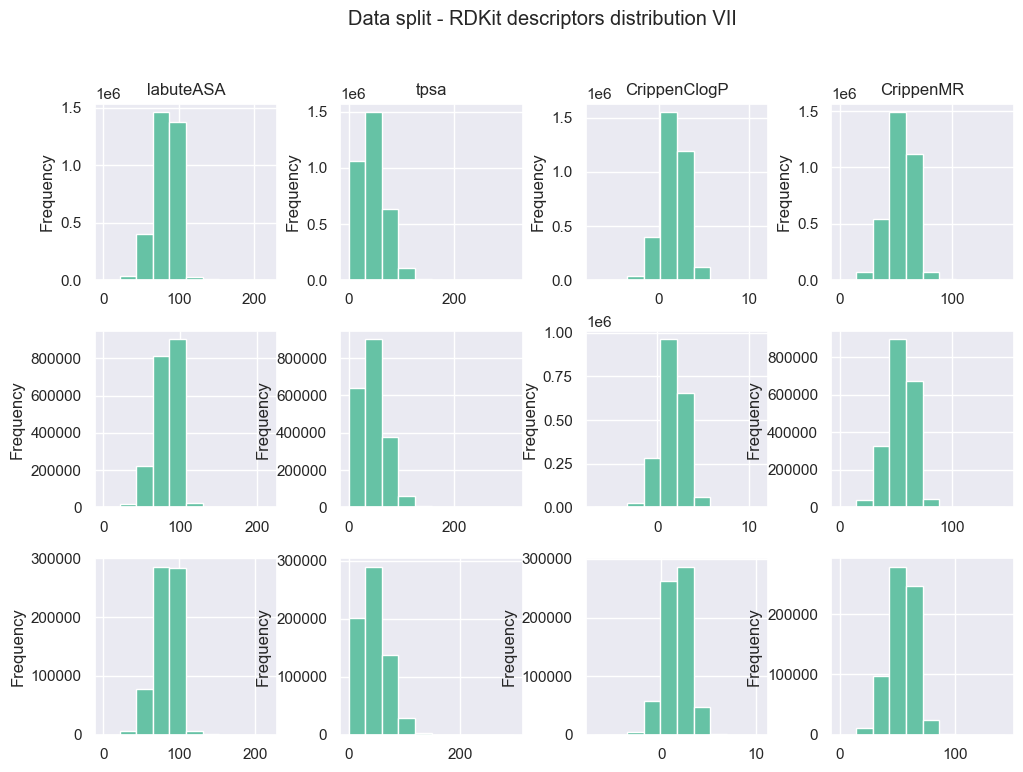

In [34]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution VII', y=1.1)

#X_train
df['labuteASA'].plot.hist( ax=axs[0,0], title='labuteASA')
df['tpsa'].plot.hist( ax=axs[0,1], title='tpsa')
df['CrippenClogP'].plot.hist( ax=axs[0,2], title='CrippenClogP')
df['CrippenMR'].plot.hist( ax=axs[0,3], title='CrippenMR')

#X_train
X_train['labuteASA'].plot.hist(ax=axs[1,0])
X_train['tpsa'].plot.hist(ax=axs[1,1])
X_train['CrippenClogP'].plot.hist(ax=axs[1,2])
X_train['CrippenMR'].plot.hist(ax=axs[1,3])

#X_val
X_val['labuteASA'].plot.hist(ax=axs[2,0])
X_val['tpsa'].plot.hist(ax=axs[2,1])
X_val['CrippenClogP'].plot.hist(ax=axs[2,2])
X_val['CrippenMR'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

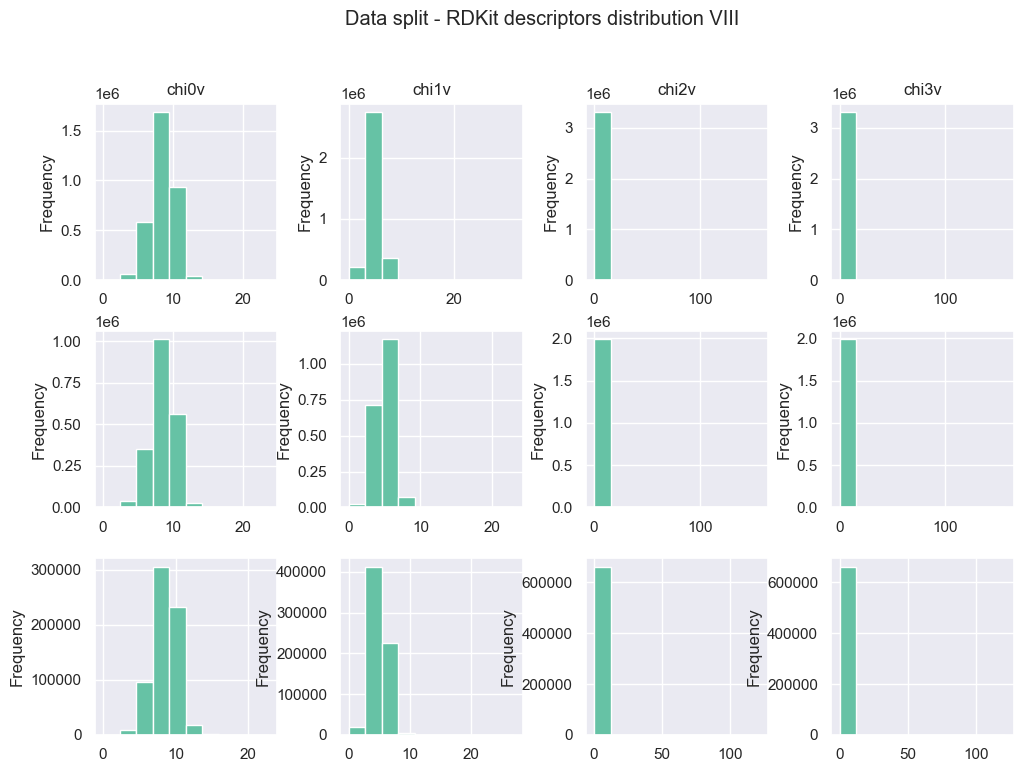

In [35]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution VIII', y=1.1)

#X_train
df['chi0v'].plot.hist( ax=axs[0,0], title='chi0v')
df['chi1v'].plot.hist( ax=axs[0,1], title='chi1v')
df['chi2v'].plot.hist( ax=axs[0,2], title='chi2v')
df['chi3v'].plot.hist( ax=axs[0,3], title='chi3v')

#X_train
X_train['chi0v'].plot.hist(ax=axs[1,0])
X_train['chi1v'].plot.hist(ax=axs[1,1])
X_train['chi2v'].plot.hist(ax=axs[1,2])
X_train['chi3v'].plot.hist(ax=axs[1,3])

#X_val
X_val['chi0v'].plot.hist(ax=axs[2,0])
X_val['chi1v'].plot.hist(ax=axs[2,1])
X_val['chi2v'].plot.hist(ax=axs[2,2])
X_val['chi3v'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

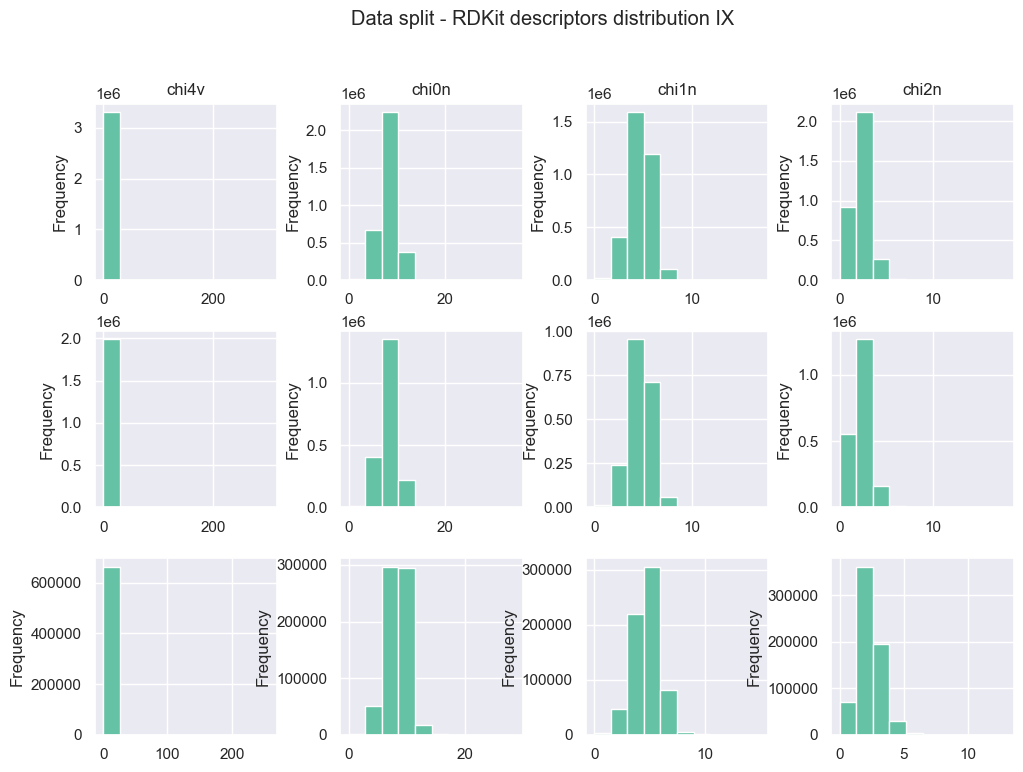

In [36]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution IX', y=1.1)

#X_train
df['chi4v'].plot.hist( ax=axs[0,0], title='chi4v')
df['chi0n'].plot.hist( ax=axs[0,1], title='chi0n')
df['chi1n'].plot.hist( ax=axs[0,2], title='chi1n')
df['chi2n'].plot.hist( ax=axs[0,3], title='chi2n')

#X_train
X_train['chi4v'].plot.hist(ax=axs[1,0])
X_train['chi0n'].plot.hist(ax=axs[1,1])
X_train['chi1n'].plot.hist(ax=axs[1,2])
X_train['chi2n'].plot.hist(ax=axs[1,3])

#X_val
X_val['chi4v'].plot.hist(ax=axs[2,0])
X_val['chi0n'].plot.hist(ax=axs[2,1])
X_val['chi1n'].plot.hist(ax=axs[2,2])
X_val['chi2n'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

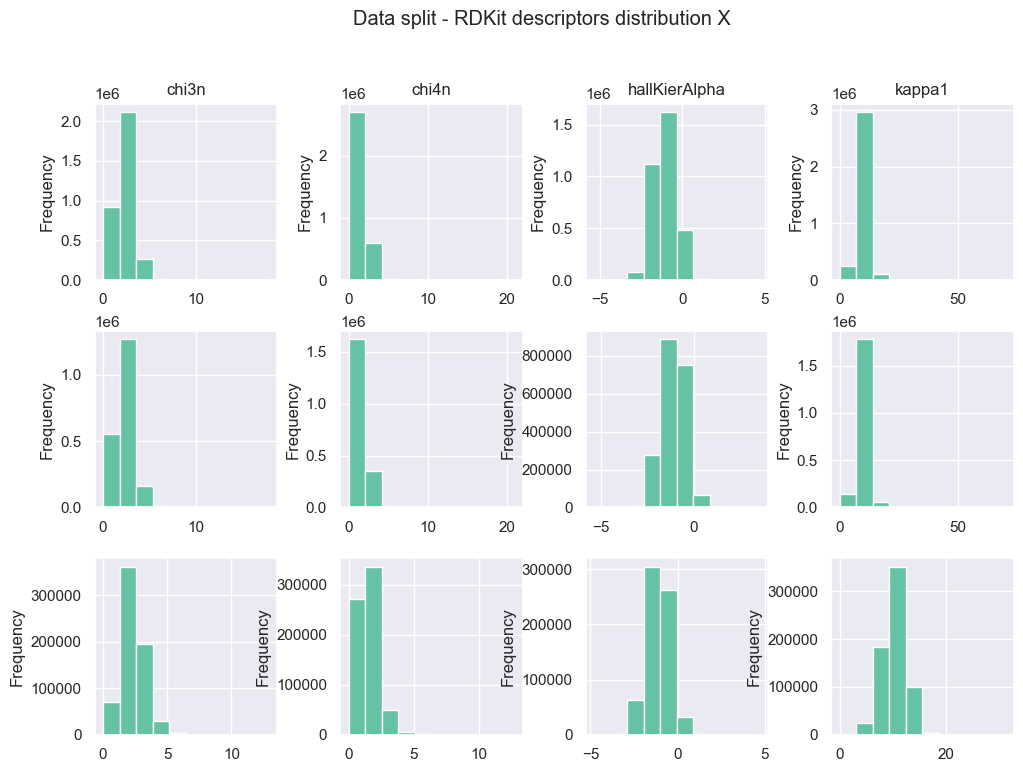

In [37]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution X', y=1.1)

#X_train
df['chi3n'].plot.hist( ax=axs[0,0], title='chi3n')
df['chi4n'].plot.hist( ax=axs[0,1], title='chi4n')
df['hallKierAlpha'].plot.hist( ax=axs[0,2], title='hallKierAlpha')
df['kappa1'].plot.hist( ax=axs[0,3], title='kappa1')

#X_train
X_train['chi3n'].plot.hist(ax=axs[1,0])
X_train['chi4n'].plot.hist(ax=axs[1,1])
X_train['hallKierAlpha'].plot.hist(ax=axs[1,2])
X_train['kappa1'].plot.hist(ax=axs[1,3])

#X_val
X_val['chi3n'].plot.hist(ax=axs[2,0])
X_val['chi4n'].plot.hist(ax=axs[2,1])
X_val['hallKierAlpha'].plot.hist(ax=axs[2,2])
X_val['kappa1'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

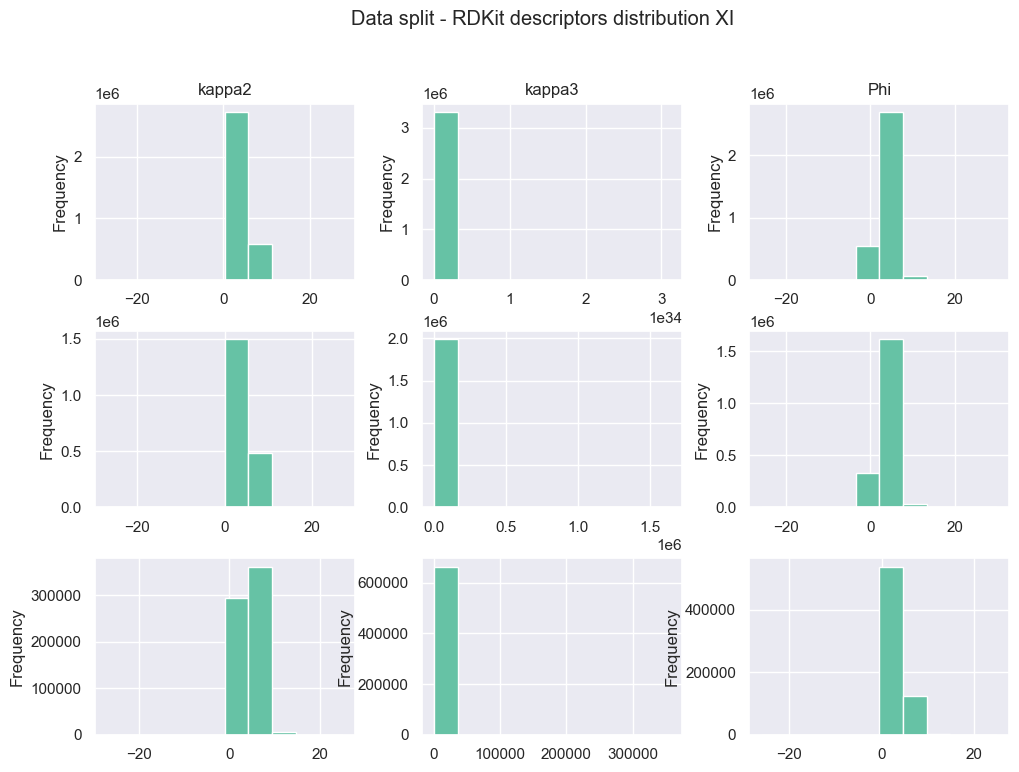

In [39]:
# PLOTS - Properties
fig, axs = plt.subplots(3,3, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution XI', y=1.1)

#X_train
df['kappa2'].plot.hist( ax=axs[0,0], title='kappa2')
df['kappa3'].plot.hist( ax=axs[0,1], title='kappa3')
df['Phi'].plot.hist( ax=axs[0,2], title='Phi')
#df['isomeric_smiles'].plot.hist( ax=axs[0,3], title='isomeric_smiles')

#X_train
X_train['kappa2'].plot.hist(ax=axs[1,0])
X_train['kappa3'].plot.hist(ax=axs[1,1])
X_train['Phi'].plot.hist(ax=axs[1,2])
#X_train['isomeric_smiles'].plot.hist(ax=axs[1,3])

#X_val
X_val['kappa2'].plot.hist(ax=axs[2,0])
X_val['kappa3'].plot.hist(ax=axs[2,1])
X_val['Phi'].plot.hist(ax=axs[2,2])
#X_val['isomeric_smiles'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

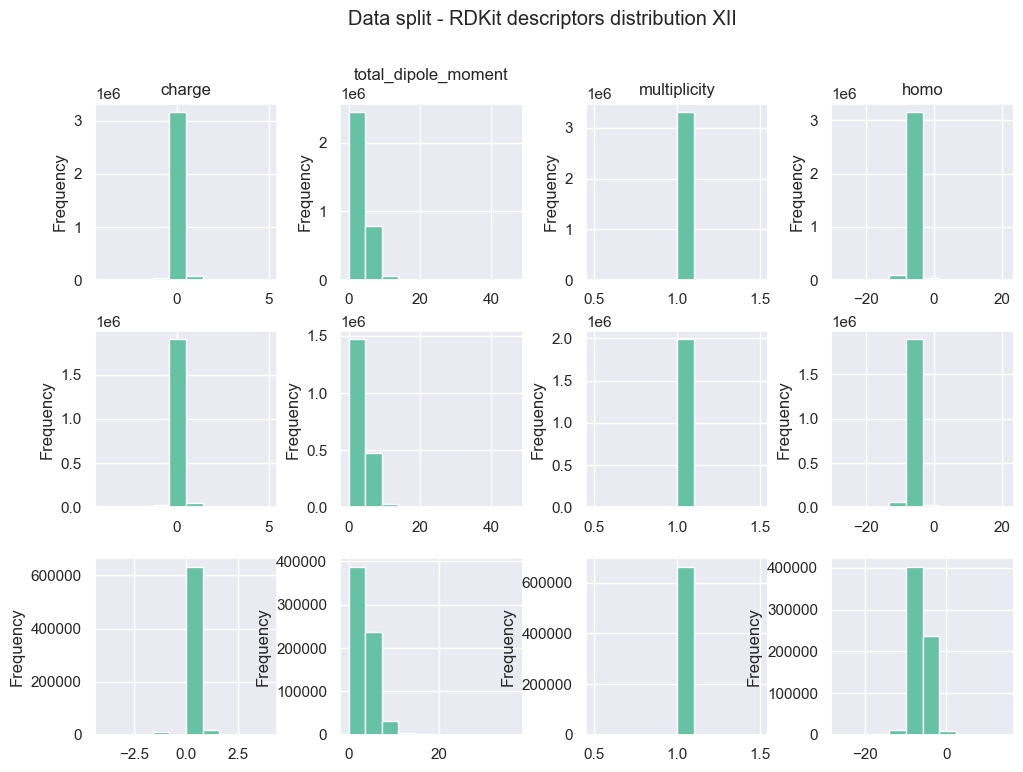

In [40]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution XII', y=1.1)

#X_train
df['charge'].plot.hist( ax=axs[0,0], title='charge')
df['total_dipole_moment'].plot.hist( ax=axs[0,1], title='total_dipole_moment')
df['multiplicity'].plot.hist( ax=axs[0,2], title='multiplicity')
df['homo'].plot.hist( ax=axs[0,3], title='homo')

#X_train
X_train['charge'].plot.hist(ax=axs[1,0])
X_train['total_dipole_moment'].plot.hist(ax=axs[1,1])
X_train['multiplicity'].plot.hist(ax=axs[1,2])
X_train['homo'].plot.hist(ax=axs[1,3])

#X_val
X_val['charge'].plot.hist(ax=axs[2,0])
X_val['total_dipole_moment'].plot.hist(ax=axs[2,1])
X_val['multiplicity'].plot.hist(ax=axs[2,2])
X_val['homo'].plot.hist(ax=axs[2,3])

<Axes: ylabel='Frequency'>

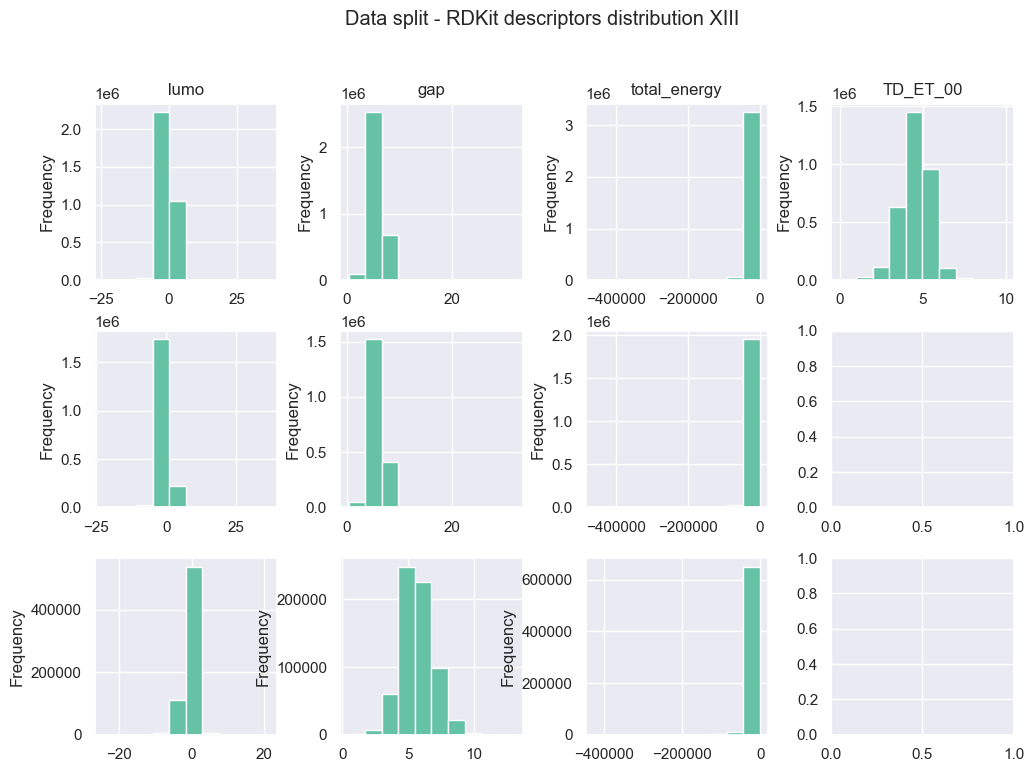

In [42]:
# PLOTS - Properties
fig, axs = plt.subplots(3,4, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Data split - RDKit descriptors distribution XIII', y=1.1)

#X_train
df['lumo'].plot.hist( ax=axs[0,0], title='lumo')
df['gap'].plot.hist( ax=axs[0,1], title='gap')
df['total_energy'].plot.hist( ax=axs[0,2], title='total_energy')
df['TD_ET_00'].plot.hist( ax=axs[0,3], title='TD_ET_00')

#X_train
X_train['lumo'].plot.hist(ax=axs[1,0])
X_train['gap'].plot.hist(ax=axs[1,1])
X_train['total_energy'].plot.hist(ax=axs[1,2])
#X_train['TD_ET_00'].plot.hist(ax=axs[1,3])

#X_val
X_val['lumo'].plot.hist(ax=axs[2,0])
X_val['gap'].plot.hist(ax=axs[2,1])
X_val['total_energy'].plot.hist(ax=axs[2,2])
#X_val['TD_ET_00'].plot.hist(ax=axs[2,3])